<a href="https://colab.research.google.com/github/venkateshsureshcks/coffee_machine/blob/main/Customer_Lifetime_Value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

path = '/content/21_customer_lifetime_value.csv'
df = pd.read_csv(path)
df.head()

,customer_id,purchase_history,tenure,total_spent,CLV
0,C1000,39,37,1111.72,3427.80
1,C1001,29,36,8556.68,25670.04
2,C1002,15,24,5317.54,10635.08
3,C1003,43,31,8276.62,21381.27
4,C1004,8,6,3053.91,1526.96


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       1000 non-null   object 
 1   purchase_history  1000 non-null   int64  
 2   tenure            1000 non-null   int64  
 3   total_spent       1000 non-null   float64
 4   CLV               1000 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 39.2+ KB


In [ ]:
df.isnull().sum()

,0
customer_id,0
purchase_history,0
tenure,0
total_spent,0
CLV,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,purchase_history,tenure,total_spent,CLV
count,1000.000000,1000.000000,1000.00000,1000.000000
mean,25.379000,30.382000,5000.45640,12535.156530
std,14.122138,16.923371,2823.52985,10837.411055
min,1.000000,1.000000,101.87000,49.710000
25%,13.000000,15.750000,2441.86750,3366.300000
50%,26.000000,31.000000,5048.90500,9498.365000
75%,37.000000,45.000000,7451.91250,18854.042500
max,49.000000,59.000000,9971.07000,47359.420000


Agg purchase history by customers
**bold text**

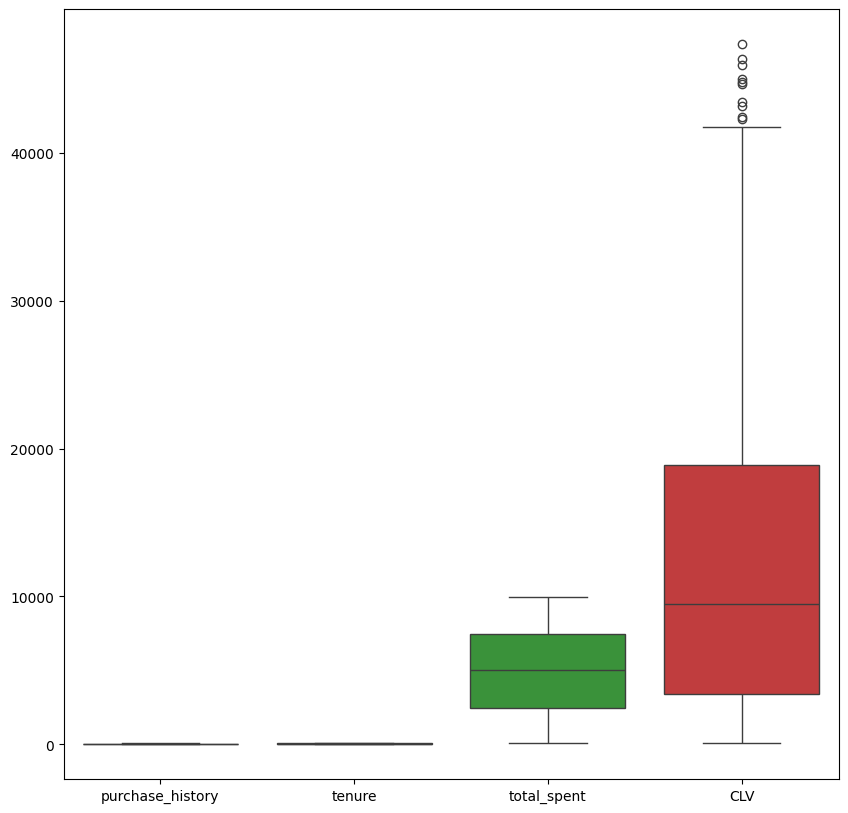

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_num = df.select_dtypes(include = 'number')
plt.figure(figsize = (10,10))
sns.boxplot(df_num, )
plt.show()

In [ ]:
df.groupby('customer_id')['purchase_history'].sum().head()

,purchase_history
customer_id,
C1000,39
C1001,29
C1002,15
C1003,43
C1004,8


**Engineer features like average purchase value, frequency, and recency.**

In [ ]:
df['avg_purchase'] = round(df['total_spent'] / df['purchase_history'],2)
df.head()

,customer_id,purchase_history,tenure,total_spent,CLV,avg_purchase
0,C1000,39,37,1111.72,3427.80,28.51
1,C1001,29,36,8556.68,25670.04,295.06
2,C1002,15,24,5317.54,10635.08,354.50
3,C1003,43,31,8276.62,21381.27,192.48
4,C1004,8,6,3053.91,1526.96,381.74


In [ ]:
df['avg_frequency'] = round(df['tenure'] / df['purchase_history'])
df.head()

,customer_id,purchase_history,tenure,total_spent,CLV,avg_purchase,avg_frequency
0,C1000,39,37,1111.72,3427.80,28.51,1.0
1,C1001,29,36,8556.68,25670.04,295.06,1.0
2,C1002,15,24,5317.54,10635.08,354.50,2.0
3,C1003,43,31,8276.62,21381.27,192.48,1.0
4,C1004,8,6,3053.91,1526.96,381.74,1.0


In [ ]:
min(df['CLV']), max(df['CLV'])

(49.71, 47359.42)

In [ ]:
bin = [0, 10000, 20000, 30000, 40000,50000]
label = ['very low', 'Low', 'Medium', 'High', 'Very High']
df['CLV_segment'] = pd.cut(df['CLV'], bins = bin, labels = label)
df.head()

,customer_id,purchase_history,tenure,total_spent,CLV,avg_purchase,avg_frequency,CLV_segment
0,C1000,39,37,1111.72,3427.80,28.51,1.0,very low
1,C1001,29,36,8556.68,25670.04,295.06,1.0,Medium
2,C1002,15,24,5317.54,10635.08,354.50,2.0,Low
3,C1003,43,31,8276.62,21381.27,192.48,1.0,Medium
4,C1004,8,6,3053.91,1526.96,381.74,1.0,very low


In [ ]:
df['CLV_segment'].value_counts()

,count
CLV_segment,
very low,524
Low,249
Medium,137
High,68
Very High,22


In [ ]:
df['CLV_segment'].isnull().sum()

np.int64(0)

In [ ]:
# from google.colab import files
# df.to_csv('customer_lifetime_value.csv', index=False)
# files.download('customer_lifetime_value.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit_transform(df['customer_id'])
encoder.fit_transform(df['CLV_segment'])

array([4, 2, 1, 2, 4, 4, 1, 4, 4, 4, 1, 4, 0, 0, 2, 3, 2, 1, 1, 4, 4, 4,
       4, 1, 0, 2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 0, 4, 1, 4, 1, 1,
       4, 1, 4, 4, 4, 4, 4, 1, 3, 4, 4, 1, 4, 0, 4, 4, 2, 4, 1, 4, 2, 4,
       4, 4, 4, 4, 4, 1, 0, 2, 4, 1, 0, 4, 0, 1, 4, 3, 4, 4, 4, 4, 4, 2,
       4, 4, 1, 1, 1, 4, 4, 0, 1, 4, 1, 1, 1, 1, 4, 1, 2, 4, 4, 4, 1, 2,
       2, 1, 4, 1, 4, 2, 2, 4, 4, 4, 4, 1, 4, 4, 1, 4, 4, 4, 1, 4, 4, 4,
       3, 1, 2, 2, 2, 0, 4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 1, 4, 1, 1,
       4, 1, 1, 2, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 0, 4, 1, 1, 1, 4, 4, 2,
       1, 1, 4, 1, 3, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 1, 1, 2, 2, 2, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 4, 1, 4, 4, 4, 2, 1,
       1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 0, 4, 1, 4, 4, 4,
       2, 2, 4, 4, 1, 4, 0, 2, 1, 1, 1, 4, 2, 4, 3, 4, 0, 4, 1, 4, 4, 1,
       0, 4, 0, 4, 4, 0, 1, 1, 1, 1, 1, 2, 1, 4, 4, 1, 4, 4, 4, 1, 4, 1,
       1, 1, 2, 0, 3, 0, 0, 4, 4, 4, 1, 4, 1, 1, 2,

In [ ]:
df1 = df.copy()

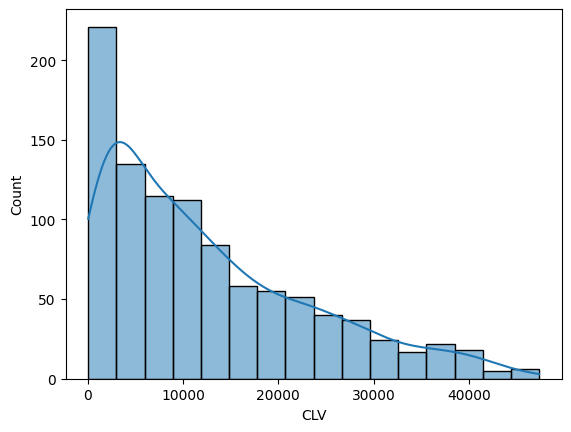

In [ ]:
sns.histplot(df['CLV'],kde = True)
plt.show()

In [ ]:
df1.head()

,customer_id,purchase_history,tenure,total_spent,CLV,avg_purchase,avg_frequency,CLV_segment
0,C1000,39,37,1111.72,3427.80,28.51,1.0,very low
1,C1001,29,36,8556.68,25670.04,295.06,1.0,Medium
2,C1002,15,24,5317.54,10635.08,354.50,2.0,Low
3,C1003,43,31,8276.62,21381.27,192.48,1.0,Medium
4,C1004,8,6,3053.91,1526.96,381.74,1.0,very low


In [ ]:
df1.head()

,customer_id,purchase_history,tenure,total_spent,CLV,avg_purchase,avg_frequency,CLV_segment
0,C1000,39,37,1111.72,3427.80,28.51,1.0,very low
1,C1001,29,36,8556.68,25670.04,295.06,1.0,Medium
2,C1002,15,24,5317.54,10635.08,354.50,2.0,Low
3,C1003,43,31,8276.62,21381.27,192.48,1.0,Medium
4,C1004,8,6,3053.91,1526.96,381.74,1.0,very low


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df1['customer_id'] = encoder.fit_transform(df1['customer_id'])

In [ ]:
df1.head()

,customer_id,purchase_history,tenure,total_spent,CLV,avg_purchase,avg_frequency,CLV_segment
0,0,39,37,1111.72,3427.80,28.51,1.0,very low
1,1,29,36,8556.68,25670.04,295.06,1.0,Medium
2,2,15,24,5317.54,10635.08,354.50,2.0,Low
3,3,43,31,8276.62,21381.27,192.48,1.0,Medium
4,4,8,6,3053.91,1526.96,381.74,1.0,very low


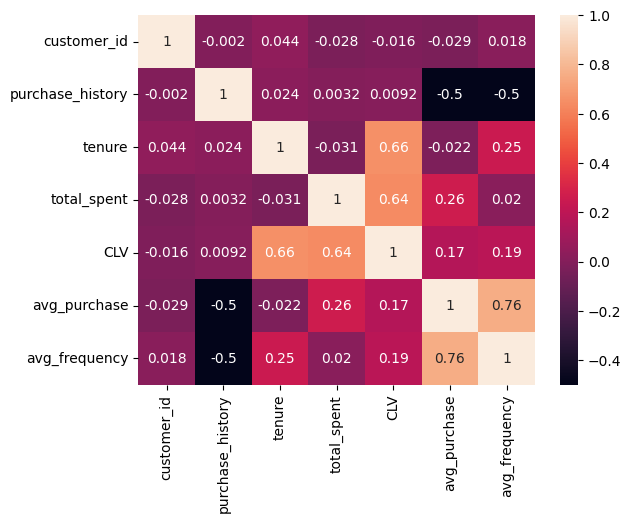

In [ ]:
sns.heatmap(df1.select_dtypes(include = 'number').corr(), annot = True, )
plt.show()

In [ ]:
X = df1[['customer_id', 'purchase_history', 'tenure', 'total_spent','avg_purchase', 'avg_frequency']]
y = df1['CLV']

X.shape, y.shape

((1000, 6), (1000,))

In [ ]:
import numpy as np
y_log = np.log1p(y)  # log transform



**Linear regression**

R² Score: 0.8332251028361197
RMSE: 0.49190311276277987


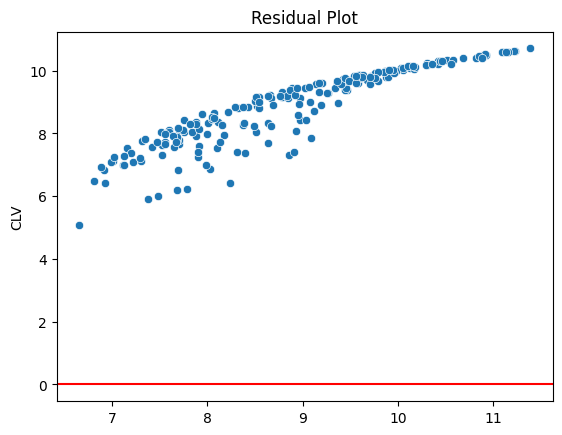

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print("R² Score:", r2_score(y_test, preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))


sns.scatterplot(x=preds, y= y_test)
plt.axhline(0, color='red')
plt.title("Residual Plot")
plt.show()




In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, preds.shape

((800, 6), (200, 6), (800,), (200,), (200,))

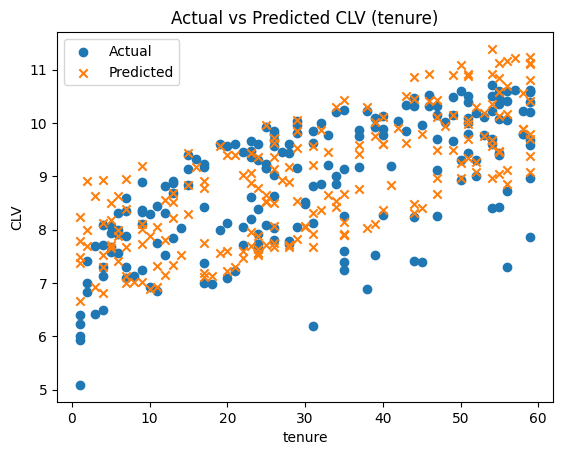

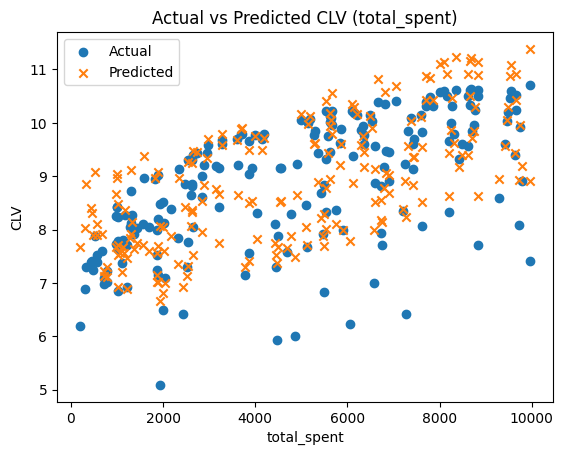

In [ ]:
for feature in df1[['tenure', 'total_spent']]:
  plt.figure()
  plt.scatter(X_test[feature], y_test, label='Actual')
  plt.scatter(X_test[feature], preds, label='Predicted', marker='x')
  plt.xlabel(feature)
  plt.ylabel('CLV')
  plt.legend()
  plt.title(f"Actual vs Predicted CLV ({feature})")
  plt.show()

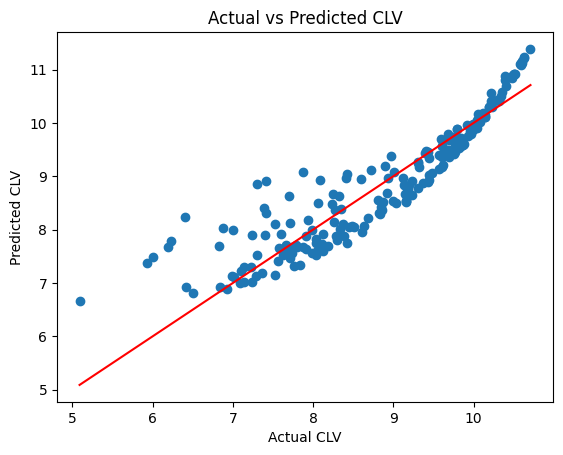

In [ ]:
plt.scatter(y_test, preds)
plt.xlabel("Actual CLV")
plt.ylabel("Predicted CLV")
plt.title("Actual vs Predicted CLV")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red")
plt.show()


**Polynominal regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

for d in range(1,6):
  poly_reg = PolynomialFeatures(degree = d)

  model = make_pipeline(poly_reg, LinearRegression())
  model.fit(X_train, y_train)
  poly_preds = model.predict(X_test)

  print("R² Score:", r2_score(y_test, poly_preds))
  print("RMSE:", np.sqrt(mean_squared_error(y_test, poly_preds)))
  print(d)
  print('_ '* 30)



R² Score: 0.8332251028361193
RMSE: 0.49190311276278054
1
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
R² Score: 0.9366863017029445
RMSE: 0.3030840425188869
2
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
R² Score: 0.9555250722677101
RMSE: 0.2540223067857248
3
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
R² Score: -0.29734564657954965
RMSE: 1.3719619898707218
4
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 
R² Score: -82.27600801442414
RMSE: 10.991935699040189
5
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 


In [ ]:
poly_reg = PolynomialFeatures(degree = 3)

model = make_pipeline(poly_reg, LinearRegression())
model.fit(X_train, y_train)
poly_preds = model.predict(X_test)

print("R² Score:", r2_score(y_test, poly_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, poly_preds)))



R² Score: 0.9555250722677101
RMSE: 0.2540223067857248


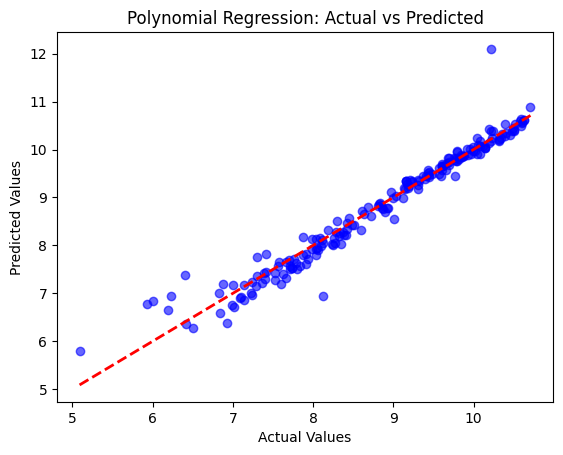

In [ ]:
import matplotlib.pyplot as plt

# Predict on test data
y_pred = model.predict(X_test)

# Plot Actual vs Predicted
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2)  # Perfect prediction line

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.show()
